Data analysis for PLR-3000 data
===============================

After bluetoothing accross, open the excel spreadsheet and save it in CSV format. Then run the code below.

In [237]:
import numpy as np
import pandas as pd

plr3000 = pd.read_csv(
    r'C:/Users/engs2242/Desktop/PLR-3000/R_20210312_132224.csv')

In [238]:
plr3000

,Record ID,Device ID,Patient ID,Time,MeasurementType,Pupil Measured,ABN,Static Measurement Duration,Static Led in uW,Static Mean,...,Unnamed: 821,Unnamed: 822,Unnamed: 823,Unnamed: 824,Unnamed: 825,Unnamed: 826,Unnamed: 827,Unnamed: 828,Unnamed: 829,Unnamed: 830
0,47,3PK200021,0,12/03/2021 13:20,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
1,46,3PK200021,0,12/03/2021 13:20,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
2,45,3PK200021,0,12/03/2021 13:19,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
3,44,3PK200021,0,12/03/2021 13:19,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,43,3PK200021,0,12/03/2021 13:18,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
5,42,3PK200021,0,12/03/2021 13:18,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
6,41,3PK200021,0,12/03/2021 13:17,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
7,40,3PK200021,0,12/03/2021 13:17,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
8,39,3PK200021,0,12/03/2021 13:16,1,Right,0,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
9,38,3PK200021,0,12/03/2021 13:16,1,Right,0,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1


Seperate raw data from summary information
------------------------------------------

In [254]:
info = []
raw_data = []
for idx, row in plr3000.iterrows():
    information = row[[col for col in plr3000.columns if not 'Unnamed' in col]]
    raw = row[[col for col in plr3000.columns if 'Unnamed' in col]]
    dl = information['Data Length']
    time = raw.iloc[0:dl].to_numpy()
    pupil = raw.iloc[dl:dl*2].to_numpy()
    valid = raw.iloc[dl*2:dl*3].to_numpy()
    df = pd.DataFrame({'onset': time,
                       'diameter': pupil,
                       'valid': valid}, dtype=float)
    df['Record ID'] = information['Record ID']
    df['Patient ID'] = information['Patient ID']
    raw_data.append(df)
    info.append(information.to_frame().T)

info = pd.concat(info).set_index(['Record ID'])
raw_data = pd.concat(raw_data).set_index(['Record ID', 'onset'])
# set invalid samples to nan
raw_data.loc[raw_data.valid==0, 'diameter'] = np.nan
raw_data['diameter_pc'] = ((raw_data['diameter']/info['PLR Diameter Init'])-1) *100

In [255]:
raw_data.diameter_pc

Record ID  onset
47         0.000    -6.90476
           0.033     -7.2619
           0.067    -7.04762
           0.100     -7.2619
           0.134    -7.33333
                      ...   
35         8.824    -1.90909
           8.857    -1.90909
           8.890    -1.81818
           8.924    -1.20455
           8.957   -0.931818
Name: diameter_pc, Length: 3497, dtype: object

In [250]:
info

,Device ID,Patient ID,Time,MeasurementType,Pupil Measured,ABN,Static Measurement Duration,Static Led in uW,Static Mean,Static Std,...,PLR Pulse Led in uW,PLR Bkg Led in uW,PLR Diameter Init,PLR Diameter End,PLR Latency,PLR Constriction Velocity,PLR Max Constriction Velocity,PLR Dilation Velocity,PLR T75,Data Length
Record ID,,,,,,,,,,,,,,,,,,,,,
47,3PK200021,0,12/03/2021 13:20,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,4.2,2.4,0.23,-2.29,-4.63,1.41,2.97,269
46,3PK200021,0,12/03/2021 13:20,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,4.6,2.7,0.23,-3.69,-5.22,1.31,2.87,269
45,3PK200021,0,12/03/2021 13:19,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,4.1,2.4,0.23,-2.67,-4.61,1.06,1.54,269
44,3PK200021,0,12/03/2021 13:19,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,4.1,2.3,0.2,-2.84,-4.84,0.92,1.77,269
43,3PK200021,0,12/03/2021 13:18,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,4.2,2.5,0.23,-3.12,-4.76,1.3,1.57,269
42,3PK200021,0,12/03/2021 13:18,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,4.5,2.4,0.23,-2.52,-5.37,1.11,2.84,269
41,3PK200021,0,12/03/2021 13:17,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,3.8,2.4,0.23,-2.83,-4.16,NaN,NaN,269
40,3PK200021,0,12/03/2021 13:17,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,3.8,2.3,0.23,-2.07,-4.21,1.52,1.4,269
39,3PK200021,0,12/03/2021 13:16,1,Right,0,NaN,NaN,NaN,NaN,...,180,0,4.1,2.3,0.23,-2.08,-4.27,NaN,NaN,269


<AxesSubplot:xlabel='onset', ylabel='diameter'>

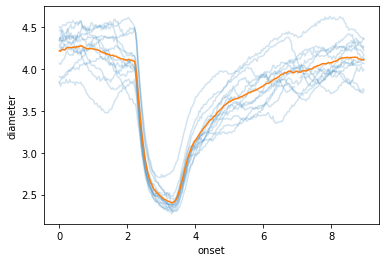

In [260]:
import seaborn as sns
data = raw_data.reset_index()

ax = sns.lineplot(
    data=data, x='onset', y='diameter', estimator=None, units='Record ID', alpha=.2)
sns.lineplot(
    data=data, x='onset', y='diameter', ax=ax, ci=None)